In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#1. Read and clean the data. Using data provided by "Partenariat Données Québec" link: 
# https://www.donneesquebec.ca/recherche/dataset/covid-19-portrait-quotidien-des-cas-confirmes


df = pd.read_csv("../data/Covid.csv")
df.drop(df.loc[df['Nb_Cas_Cumulatif']==0].index, inplace=True)
df

,Date,Nb_Cas_Cumulatif,Nb_Nvx_Cas,Nb_Deces_Cumulatif_Total,Nb_Deces_Cumulatif_CHCHSLD,Nb_Deces_Cumulatif_RPA,Nb_Deces_Cumulatif_DomInc,Nb_Deces_Cumulatif_Autre,Nb_Nvx_Deces_Total,Nb_Nvx_Deces_CHCHSLD,Nb_Nvx_Deces_RPA,Nb_Nvx_Deces_DomInc,Nb_Nvx_Deces_Autre
44,2020-03-06,1,1,0,0,0,0,0,0,0,0,0,0
45,2020-03-07,1,0,0,0,0,0,0,0,0,0,0,0
46,2020-03-08,1,0,0,0,0,0,0,0,0,0,0,0
47,2020-03-09,1,0,0,0,0,0,0,0,0,0,0,0
48,2020-03-10,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,2023-01-05,1289358,879,17642,6821,3400,6654,767,11,1,1,8,1
1080,2023-01-06,1290126,768,17651,6821,3400,6663,767,9,0,0,9,0
1081,2023-01-07,1290671,545,17658,6822,3401,6668,767,7,1,1,5,0
1082,2023-01-08,1291256,585,17665,6824,3402,6672,767,7,2,1,4,0


In [3]:
schools_df = df[['Date','Nb_Nvx_Cas']]
schools_df.rename(columns={'Nb_Nvx_Cas':'schools'})

schools_df['Date'] = pd.to_datetime(schools_df['Date'])
schools_df = schools_df[schools_df['Date'].dt.year == 2020]

/var/folders/37/6z3y3bf9613_h77jbbd915d00000gn/T/ipykernel_3528/1653439631.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schools_df['Date'] = pd.to_datetime(schools_df['Date'])


In [4]:
m = [7,8,9,10]
df = schools_df[schools_df['Date'].dt.month.isin(m)]
months = datetime.strptime('2020-08-31', "%Y-%m-%d")
df['interest_time'] = df['Date'] - months
df['interest_time'] = df['interest_time'].astype('timedelta64[D]')
df

/var/folders/37/6z3y3bf9613_h77jbbd915d00000gn/T/ipykernel_3528/1174702972.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['interest_time'] = df['Date'] - months
/var/folders/37/6z3y3bf9613_h77jbbd915d00000gn/T/ipykernel_3528/1174702972.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['interest_time'] = df['interest_time'].astype('timedelta64[D]')


,Date,Nb_Nvx_Cas,interest_time
161,2020-07-01,83,-61.0
162,2020-07-02,70,-60.0
163,2020-07-03,87,-59.0
164,2020-07-04,92,-58.0
165,2020-07-05,53,-57.0
...,...,...,...
279,2020-10-27,1072,57.0
280,2020-10-28,930,58.0
281,2020-10-29,1016,59.0
282,2020-10-30,975,60.0


In [5]:
df['seperate'] = None
df.loc[df['interest_time']<0, 'seperate'] = 0
df.loc[df['interest_time']>=0, 'seperate'] = 1

/var/folders/37/6z3y3bf9613_h77jbbd915d00000gn/T/ipykernel_3528/1569726356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seperate'] = None


In [6]:
# Lets make 2 regression models, the first one will be before the lockdown of the schools
# Before lockdown model

before = df[df['seperate']==0]
X = np.array(before['interest_time']*-1)
X1 = sm.add_constant(X)
y = before['Nb_Nvx_Cas']
before = sm.WLS(y, X1).fit()
print(before.summary())

                            WLS Regression Results                            
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.030
Model:                            WLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.798
Date:                Thu, 12 Jan 2023   Prob (F-statistic):              0.185
Time:                        11:33:04   Log-Likelihood:                -304.04
No. Observations:                  61   AIC:                             612.1
Df Residuals:                      59   BIC:                             616.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.4115      9.320     10.989      0.0

In [7]:
# After lockdown

after = df[df['seperate']==1]

X_after = np.array(after['interest_time'])
X2 = sm.add_constant(X_after)
y_after = after['Nb_Nvx_Cas']
after = sm.WLS(y_after, X2).fit()
print(after.summary())

                            WLS Regression Results                            
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.701
Model:                            WLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     140.9
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           2.19e-17
Time:                        11:33:05   Log-Likelihood:                -413.81
No. Observations:                  62   AIC:                             831.6
Df Residuals:                      60   BIC:                             835.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        219.6866     48.881      4.494      0.0

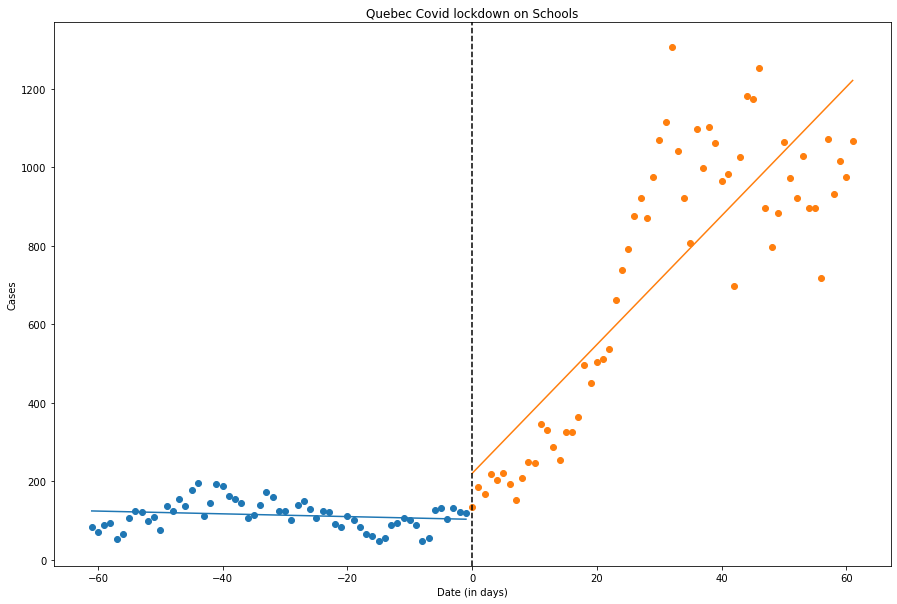

In [9]:
# Now we can plot the graphs
predictions_before = before.fittedvalues
predictions_after = after.fittedvalues

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(X1[:,1]*-1, y)
ax.plot(X1[:,1]*-1, predictions_before)
ax.scatter(X2[:,1], y_after)
ax.plot(X2[:,1], predictions_after)
ax.set_title('Quebec Covid lockdown on Schools')
ax.set_ylabel('Cases')
ax.set_xlabel('Date(in days)')
ax.axvline(0,color='black',alpha=1, ls = '--')
plt.show()

The P-value:

As shown above, the p-value is 0.000, which is less than 0.05, meaning we can reject the null hypothesis and conclude that the reopening of schools had a statistically significant effect on Covid cases.

The Coef:

As shown above, the coef is a positive value. Since the coefficient represents the average change in the response variable( in this case "Covid cases") associated with one-unit change with the predictor variable (in this case "the reopening of schools"), we can conclude that reopening increased the number of cases.

A justification on the design of your regression:

The DV is the number of daily cases, the IV is the amout of time before and after the reopening. We chose to add a month to the "before" and "after" because the virus has a 2 week incubation period, meaning some cases would not show up until the following month. We also chose to keep it simple and stick with a regular regression model for this particular case as the evidence is quite apparent and shows the effects of the reopening on the covid cases clearly.

Ending paragraphs:

    In conclusion, we can see that he 20/3/2020 lockdown, the reopening of schools on 31/8/2020, and the 25/12/2020 lockdown all had an effect on the number of Covid cases in Quebec. Starting with the 20/3/2020 lockdown, it's clear that there was still a steady increase in the number of cases, however this increase could have been uch more severe if the lockdown was not put in place. This is shown in the next example with the reopening of schools. We can see a significant increase in the rate at which covid cases increased per day after the schools reopened. This leads us to conclude that not only did the reopening of schools had a significant stastitical increase on the number of covid cases, but that the 20/3/2020 lockdown possibly decreased the number of cases. We reach this conclusion by seeing how drastically the reopening had an impact, so we can assume that the lockdown had an inverse effect, at least to a certain degree.

    Finally, the The 25/12/2020 lockdown (insert Jamie's findings here)